<h1 style="font-size: 30px; font-family: Arial, sans-serif;">Loading Libraries </h1>

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from matplotlib.colors import ListedColormap
from sklearn import metrics
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

<h1 style="font-size: 30px; font-family: Arial, sans-serif;">Import Dataset</h1>

In [41]:
heart_disease_df = pd.read_csv('heart_disease.csv')
heart_disease_df.head()

,HeartDiseaseorAttack,HighBP,HighChol,BMI,Smoker,Diabetes,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,MentHlth,PhysHlth,Sex,Age,Education,Income
0,0.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,1.0,0.0,18.0,15.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,25.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,28.0,0.0,0.0,0.0,1.0,0.0,0.0,30.0,30.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,27.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,24.0,0.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,0.0,11.0,5.0,4.0


<h1 style="font-size: 30px; font-family: Arial, sans-serif;">Exploratory Data Analysis</h1>

In [3]:
heart_disease_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 16 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   HeartDiseaseorAttack  253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   BMI                   253680 non-null  float64
 4   Smoker                253680 non-null  float64
 5   Diabetes              253680 non-null  float64
 6   PhysActivity          253680 non-null  float64
 7   Fruits                253680 non-null  float64
 8   Veggies               253680 non-null  float64
 9   HvyAlcoholConsump     253680 non-null  float64
 10  MentHlth              253680 non-null  float64
 11  PhysHlth              253680 non-null  float64
 12  Sex                   253680 non-null  float64
 13  Age                   253680 non-null  float64
 14  Education             253680 non-null  float64
 15  

In [4]:
heart_disease_df.shape

(253680, 16)

In [5]:
print(*heart_disease_df.columns,sep=' | ')

HeartDiseaseorAttack | HighBP | HighChol | BMI | Smoker | Diabetes | PhysActivity | Fruits | Veggies | HvyAlcoholConsump | MentHlth | PhysHlth | Sex | Age | Education | Income


In [6]:
heart_disease_df.describe()

,HeartDiseaseorAttack,HighBP,HighChol,BMI,Smoker,Diabetes,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,MentHlth,PhysHlth,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.094186,0.429001,0.424121,28.382364,0.443169,0.296921,0.756544,0.634256,0.811420,0.056197,3.184772,4.242081,0.440342,8.032119,5.050434,6.053875
std,0.292087,0.494934,0.494210,6.608694,0.496761,0.698160,0.429169,0.481639,0.391175,0.230302,7.412847,8.717951,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,24.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,27.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,31.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,2.000000,3.000000,1.000000,10.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,98.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,30.000000,30.000000,1.000000,13.000000,6.000000,8.000000


<h1 style="font-size: 30px; font-family: Arial, sans-serif;">Data Cleaning</h1>

In [7]:
#checking for null values 
heart_disease_df.isnull().any()

HeartDiseaseorAttack    False
HighBP                  False
HighChol                False
BMI                     False
Smoker                  False
Diabetes                False
PhysActivity            False
Fruits                  False
Veggies                 False
HvyAlcoholConsump       False
MentHlth                False
PhysHlth                False
Sex                     False
Age                     False
Education               False
Income                  False
dtype: bool

In [59]:
#checking for values with 0
zero_counts=heart_disease_df.eq(0).sum()
zero_counts

HeartDiseaseorAttack    229787
HighBP                  144851
HighChol                146089
BMI                          0
Smoker                  141257
Diabetes                213703
PhysActivity             61760
Fruits                   92782
Veggies                  47839
HvyAlcoholConsump       239424
MentHlth                175680
PhysHlth                160052
Sex                     141974
Age                          0
Education                    0
Income                       0
dtype: int64

<h1 style="font-size: 30px; font-family: Arial, sans-serif;">Visualizing Features Distribution</h1>

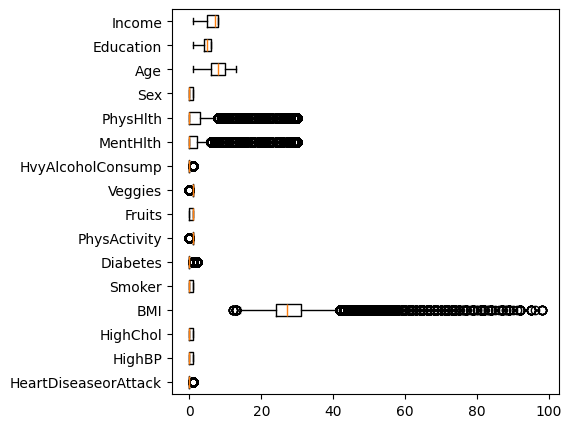

In [9]:
plt.figure(figsize=(5,5))
plt.boxplot(heart_disease_df,tick_labels=heart_disease_df.columns,vert=False)
plt.show()

<h1 style="font-size: 30px; font-family: Arial, sans-serif;"> Creating dependent and independent variables  </h1>

In [10]:
X=heart_disease_df.drop('HeartDiseaseorAttack',axis=1)
y=heart_disease_df['HeartDiseaseorAttack']
print(X.shape,'\n',y.shape)

(253680, 15) 
 (253680,)


<h1 style="font-size: 30px; font-family: Arial, sans-serif;">Correlation between Features and Target</h1>

In [11]:
X_columns=X.columns
for feature in X_columns:
    correlation=X[feature].corr(heart_disease_df['HeartDiseaseorAttack'])
    print(f'correlation for {feature} = {correlation}')

correlation for HighBP = 0.20936121069003594
correlation for HighChol = 0.18076535489000403
correlation for BMI = 0.052904256455537695
correlation for Smoker = 0.11444121771036901
correlation for Diabetes = 0.18027168633560295
correlation for PhysActivity = -0.08729898692452454
correlation for Fruits = -0.019790347908616914
correlation for Veggies = -0.03916740903628846
correlation for HvyAlcoholConsump = -0.02899051566657063
correlation for MentHlth = 0.06462129196931952
correlation for PhysHlth = 0.18169753577563483
correlation for Sex = 0.08609550814379162
correlation for Age = 0.22161763244723234
correlation for Education = -0.09959991537786159
correlation for Income = -0.14101123143378935


<Axes: title={'center': 'Features correlation matrix'}>

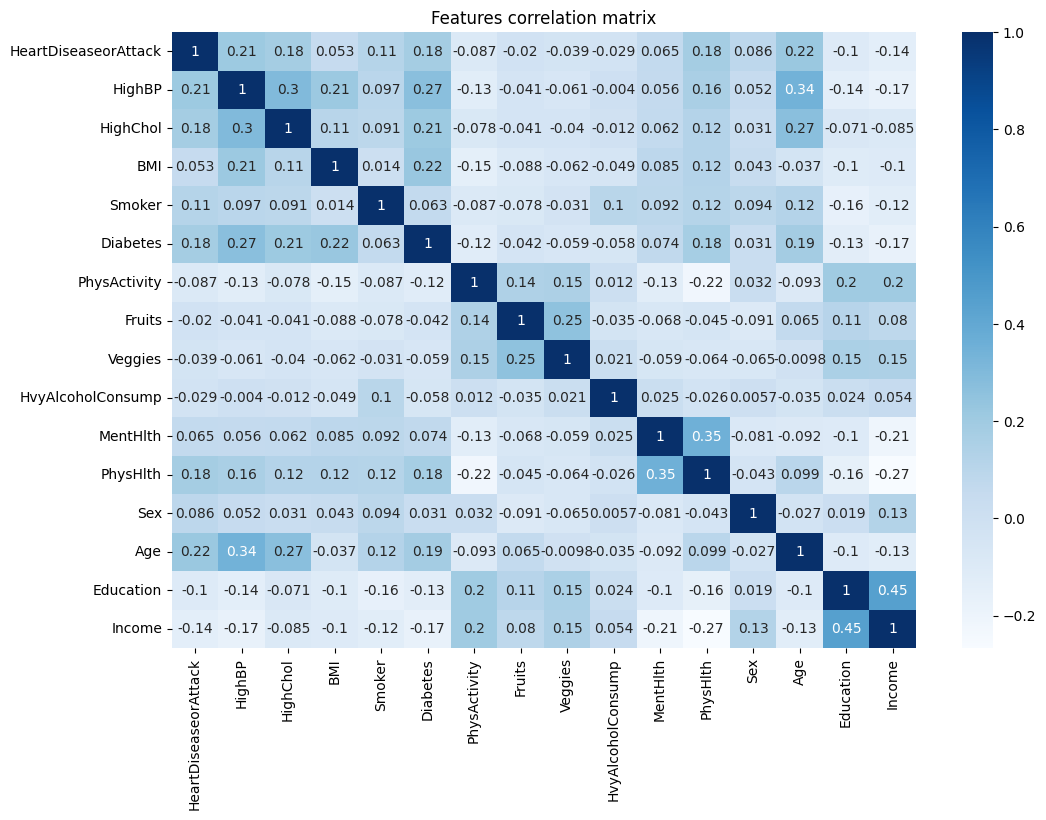

In [44]:
corr= heart_disease_df.corr()
#creating a heatmap to understand correlation
plt.figure(figsize=(12,8))
plt.title('Features correlation matrix')
sns.heatmap(corr,annot=True,cmap='Blues',)

<h1 style="font-size: 30px; font-family: Arial, sans-serif;">Checking for Target Ratio</h1>

In [13]:
#target column ratio
target_ratio = y.value_counts()/len(y)
print(f'Target Ratio:{target_ratio}')

Target Ratio:HeartDiseaseorAttack
0.0    0.905814
1.0    0.094186
Name: count, dtype: float64


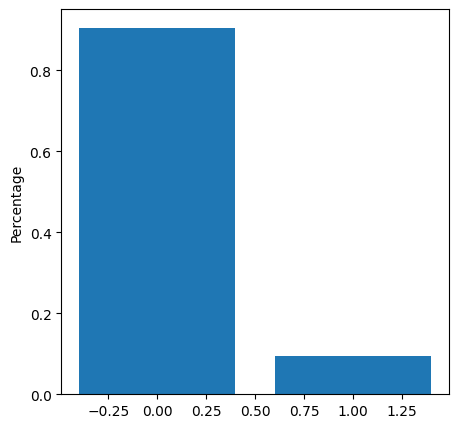

In [14]:
#visualizing imbalance in target column 
plt.figure(figsize = (5,5))
plt.bar(target_ratio.index,target_ratio)
plt.ylabel('Percentage')
plt.show()

<h1 style="font-size: 30px; font-family: Arial, sans-serif;">Scaling Independent Variables </h1>

In [15]:
scl=MinMaxScaler()
X = scl.fit_transform(X)

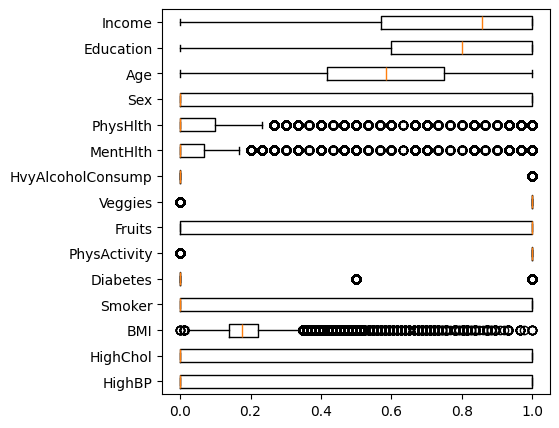

In [16]:
# visualization of scaled independent variables
x_cols=heart_disease_df.drop('HeartDiseaseorAttack',axis=1).columns
plt.figure(figsize=(5,5))
plt.boxplot(X,tick_labels=x_cols,vert=False)
plt.show()

<h1 style="font-size: 30px; font-family: Arial, sans-serif;">Splitting Data into Train and Test sets</h1>

In [17]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=25)
print(f'x_train shape:{x_train.shape}\nx_test shape:{x_test.shape}\ny_train shape:{y_train.shape}\nx_test shape:{x_test.shape}')

x_train shape:(202944, 15)
x_test shape:(50736, 15)
y_train shape:(202944,)
x_test shape:(50736, 15)


<h1 style="font-size: 30px; font-family: Arial, sans-serif;">Handling Target  Class Imbalance </h1>

In [45]:
OverSampleData = SMOTE()
x_smote,y_smote= OverSampleData.fit_resample(X,y)

In [46]:
x_smote.shape

(459574, 15)

In [47]:
#checking class balance
new_target_ratio= y_smote.value_counts()/len(y_smote)
new_target_ratio

HeartDiseaseorAttack
0.0    0.5
1.0    0.5
Name: count, dtype: float64

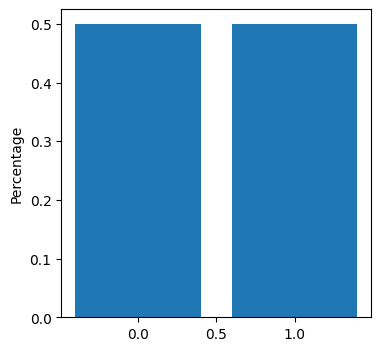

In [48]:
#visualizing class balance
plt.figure(figsize = (4,4))
plt.bar(new_target_ratio.index,new_target_ratio)
plt.ylabel('Percentage')
plt.show()

In [50]:
#splitting Oversampled data into test and train
x_trainSmote,x_testSmote,y_trainSmote,y_testSmote = train_test_split(x_smote,y_smote,test_size = 0.3)

In [51]:
print(x_trainSmote.shape, '\n',x_testSmote.shape,'\n',y_trainSmote.shape,'\n',y_testSmote.shape)

(321701, 15) 
 (137873, 15) 
 (321701,) 
 (137873,)


<h1 style="font-size: 30px; font-family: Arial, sans-serif;">LogisticRegression Model Training  </h1>

In [25]:
#define parameter grid
param_grid={
     'C': [0.5, 1, 2],  
    'penalty': ['l2'],  
    'solver': ['saga'],  
    'class_weight': ['balanced'],  
    'max_iter': [300, 500, 700],  
    'tol': [1e-3, 1e-4, 1e-5],  
}

#instantiating LogisticRegression 
log_reg2=LogisticRegression(random_state=25)

#setting up grid search cv
grid_search=GridSearchCV(
    estimator=log_reg2,
    param_grid=param_grid,
    scoring='f1_macro',
    cv=5
)
#fitting gridsearchCV
grid_search.fit(x_trainSmote,y_trainSmote)
#display the best parameters 
best_params=grid_search.best_params_
print(f'Best Parameters:{best_params}')

C:\Users\ogalo\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\ma\core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best Parameters:{'C': 0.5, 'class_weight': 'balanced', 'max_iter': 300, 'penalty': 'l2', 'solver': 'saga', 'tol': 0.001}


<h1 style="font-size: 30px; font-family: Arial, sans-serif;"> Model Training with Best Hyperparameters</h1>

In [26]:
#initializing LogisticRegression with best parameters 
logReg_best = LogisticRegression(
    C=0.5, 
    class_weight= 'balanced', 
    max_iter= 300, 
    penalty= 'l2', 
    solver= 'saga', 
    tol= 0.0001,
    random_state=42
)
#fitting data
logReg_best.fit(x_trainSmote,y_trainSmote)

LogisticRegression(C=0.5, class_weight='balanced', max_iter=300,
                   random_state=42, solver='saga')

<h1 style="font-size: 30px; font-family: Arial, sans-serif;">XGBoosting Training </h1>

In [27]:
xgb = XGBClassifier(n_estimators=200, learning_rate=0.05, max_depth=4, scale_pos_weight=1, random_state=42)
xgb.fit(x_trainSmote, y_trainSmote)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

<h1 style="font-size: 30px; font-family: Arial, sans-serif;"> Naive Bayes Model Training </h1>

In [28]:
#selecting best hyperparameters 
params = {
    'alpha': [0.01, 0.1, 0.5, 1.0],
    'binarize': [0.0, 0.5, 1.0, None],
    'fit_prior': [True, False]
}

grid_search = GridSearchCV(BernoulliNB(), param_grid=params, scoring='accuracy', cv=5)
grid_search.fit(x_trainSmote,y_trainSmote)
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

Best Parameters: {'alpha': 0.01, 'binarize': 0.5, 'fit_prior': True}
Best Accuracy: 0.7384061604233084


In [31]:
best_modelNB = grid_search.best_estimator_
y_pred = best_modelNB.predict(x_testSmote)

<h1 style="font-size: 30px; font-family: Arial, sans-serif;"> Evaluating each model </h1>

In [52]:
#predicting on xtest
xgb_pred = xgb.predict(x_testSmote)
lr_pred = logReg_best.predict(x_testSmote)
nb_pred = best_modelNB.predict(x_testSmote)

#computing performance metrics for each model
def evaluate_model(y_true,y_pred,model_name):
    print(f"Performance of {model_name}:")
    print(f"Accuracy: {accuracy_score(y_true, y_pred):.4f}")
    print(f"Precision: {precision_score(y_true, y_pred, average='weighted'):.4f}")
    print(f"Recall: {recall_score(y_true, y_pred, average='weighted'):.4f}")
    print(f"F1 Score: {f1_score(y_true, y_pred, average='weighted'):.4f}")
    print("=" * 40)

evaluate_model(y_testSmote, xgb_pred, "XGBoost")
evaluate_model(y_testSmote, lr_pred, "Logistic Regression")
evaluate_model(y_testSmote, nb_pred, "Naive Bayes")

Performance of XGBoost:
Accuracy: 0.9022
Precision: 0.9023
Recall: 0.9022
F1 Score: 0.9022
Performance of Logistic Regression:
Accuracy: 0.7577
Precision: 0.7592
Recall: 0.7577
F1 Score: 0.7574
Performance of Naive Bayes:
Accuracy: 0.7402
Precision: 0.7408
Recall: 0.7402
F1 Score: 0.7400


In [53]:
xgb_proba = xgb.predict_proba(x_testSmote)[:, 1]
lr_proba = logReg_best.predict_proba(x_testSmote)[:, 1]
nb_proba = best_modelNB.predict_proba(x_testSmote)[:, 1]

print(f"AUC XGBoost: {roc_auc_score(y_testSmote, xgb_proba):.4f}")
print(f"AUC Logistic Regression: {roc_auc_score(y_testSmote, lr_proba):.4f}")
print(f"AUC Naive Bayes: {roc_auc_score(y_testSmote, nb_proba):.4f}")

AUC XGBoost: 0.9689
AUC Logistic Regression: 0.8296
AUC Naive Bayes: 0.8153


<h1 style="font-size: 30px; font-family: Arial, sans-serif;"> Comparing the results of Model Performance  </h1>

In [54]:
results = {
    "Model": ["XGBoost", "Logistic Regression", "Naive Bayes"],
    "Accuracy": [
        accuracy_score(y_testSmote, xgb_pred),
        accuracy_score(y_testSmote, lr_pred),
        accuracy_score(y_testSmote, nb_pred),
    ],
    "Precision": [
        precision_score(y_testSmote, xgb_pred, average="weighted"),
        precision_score(y_testSmote, lr_pred, average="weighted"),
        precision_score(y_testSmote, nb_pred, average="weighted"),
    ],
    "Recall": [
        recall_score(y_testSmote, xgb_pred, average="weighted"),
        recall_score(y_testSmote, lr_pred, average="weighted"),
        recall_score(y_testSmote, nb_pred, average="weighted"),
    ],
    "F1 Score": [
        f1_score(y_testSmote, xgb_pred, average="weighted"),
        f1_score(y_testSmote, lr_pred, average="weighted"),
        f1_score(y_testSmote, nb_pred, average="weighted"),
    ],
    "AUC": [
        roc_auc_score(y_testSmote, xgb_proba),
        roc_auc_score(y_testSmote, lr_proba),
        roc_auc_score(y_testSmote, nb_proba),
    ],
}
results_df = pd.DataFrame(results)
results_df

,Model,Accuracy,Precision,Recall,F1 Score,AUC
0,XGBoost,0.902171,0.902286,0.902171,0.902163,0.968934
1,Logistic Regression,0.757705,0.759202,0.757705,0.757365,0.829568
2,Naive Bayes,0.740196,0.740799,0.740196,0.740041,0.815274


<h1 style="font-size: 30px; font-family: Arial, sans-serif;"> Most Important Drivers for Heart Disease  </h1>

In [55]:
#feature importances for XGBoost
xgb_importances = xgb.feature_importances_
f_importance= pd.DataFrame({'Features':heart_disease_df.drop('HeartDiseaseorAttack',axis=1).columns,'Importance': xgb_importances})
f_importance.sort_values(by='Importance', ascending= False).reset_index()

,index,Features,Importance
0,0,HighBP,0.157508
1,12,Age,0.148354
2,1,HighChol,0.094969
3,4,Diabetes,0.092403
4,2,BMI,0.091041
5,13,Education,0.076316
6,14,Income,0.076282
7,10,PhysHlth,0.066396
8,11,Sex,0.057744
9,9,MentHlth,0.049896
